In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.text_cell_render.rendered_html{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:19pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:18px;}
</style>
"""))

<font size="5" color="red">ch2. 군집분석</font>

In [2]:
# sklearn 병렬처리를 하지 않도록 설정(Open Multi-Processing)
# 특정 군집분석 라이브러리가 joblib을 사용하면서 충돌 경고 메세지를 출력
import os
os.environ["OMP_NUM_THREADS"] = "1"

# 1절. 군집모형(=군집모델=클러스터링)
- 클러스터(cluster) : 독립변수의 특성이 유사한 데이터의 그룹
- 클러스터링(clustering) : 주어진 데이터를 여러개의 클러스터로 구분하는 것

1) 중심점 기반 클러스터링(K-Means) : 
    https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg 
    
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
      style="margin-left:0; width:20%">

2) 연결(밀도)기반 클러스터링(DBSCAN) :
    https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
    
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
     style="margin-left:0; width:20%">

# 2절. K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 몇 개 클러스터로 나눌지 미리 지정해야 함

In [3]:
# 그래프 저장시 해상도 높게
%config InlineBackend.figure_format = "retina"
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

In [36]:
# 분류를 위한 가상 데이터 셋을 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, # 데이터 갯수(기본값 100)
                    n_features=2, # 독립변수 갯수(기본값 20)
                    n_informative=2, # 종속변수에 영향을 주는 변수 갯수
                    n_redundant=0, # 종속변수에 영향을 안 미치는 변수 갯수
                    n_clusters_per_class=1, # 각 클래스당 군의 갯수(군에 서브 그룹이 없다)
                    n_classes=2, # 종속변수의 클래스 수
                    random_state=123)
X.shape, y.shape

((20, 2), (20,))

In [38]:
import numpy as np
np.c_[X, y][:3]

array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

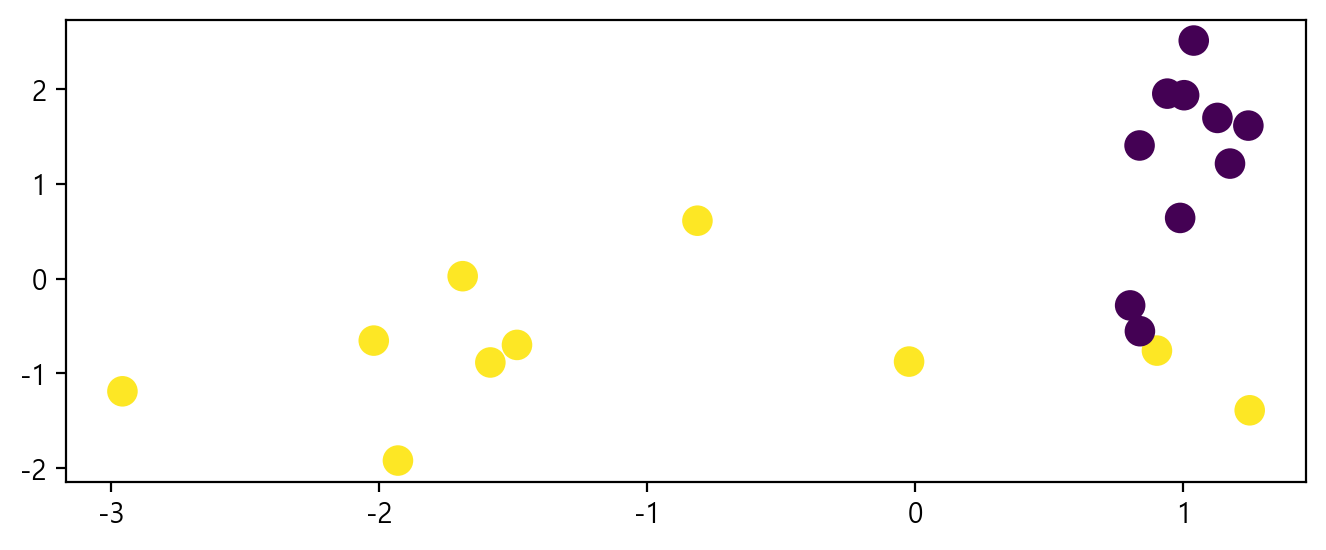

In [42]:
plt.figure(figsize=(8,3))
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=100)
plt.show()

In [67]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, # 클러스터의 갯수
              init='random', # random(중심초기점이 random), k-means++(멀리 떨어진 초기점)
              n_init=5,
              max_iter=300)
model.fit(X)

KMeans(init='random', n_clusters=2, n_init=5)

In [68]:
model.cluster_centers_ # 최종 두 클러스터의 중심점

array([[-1.56258716, -0.69768199],
       [ 1.01138251,  0.83200493]])

In [69]:
pred = model.predict(X)
print(' 예 측 값 :', pred)
print('modelLabel:', model.labels_)
print(' 실제 y값 :', y)

 예 측 값 : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
modelLabel: [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
 실제 y값 : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


In [70]:
# k-means가 0 그룹분류된 X데이터
X[model.labels_==0]

array([[-1.6881048 ,  0.02599427],
       [-0.02317631, -0.87481215],
       [-1.9295722 , -1.91894047],
       [-0.8124957 ,  0.61140818],
       [-1.48554751, -0.69890985],
       [-2.95714561, -1.18843377],
       [-1.5849172 , -0.88425569],
       [-2.0197379 , -0.65350646]])

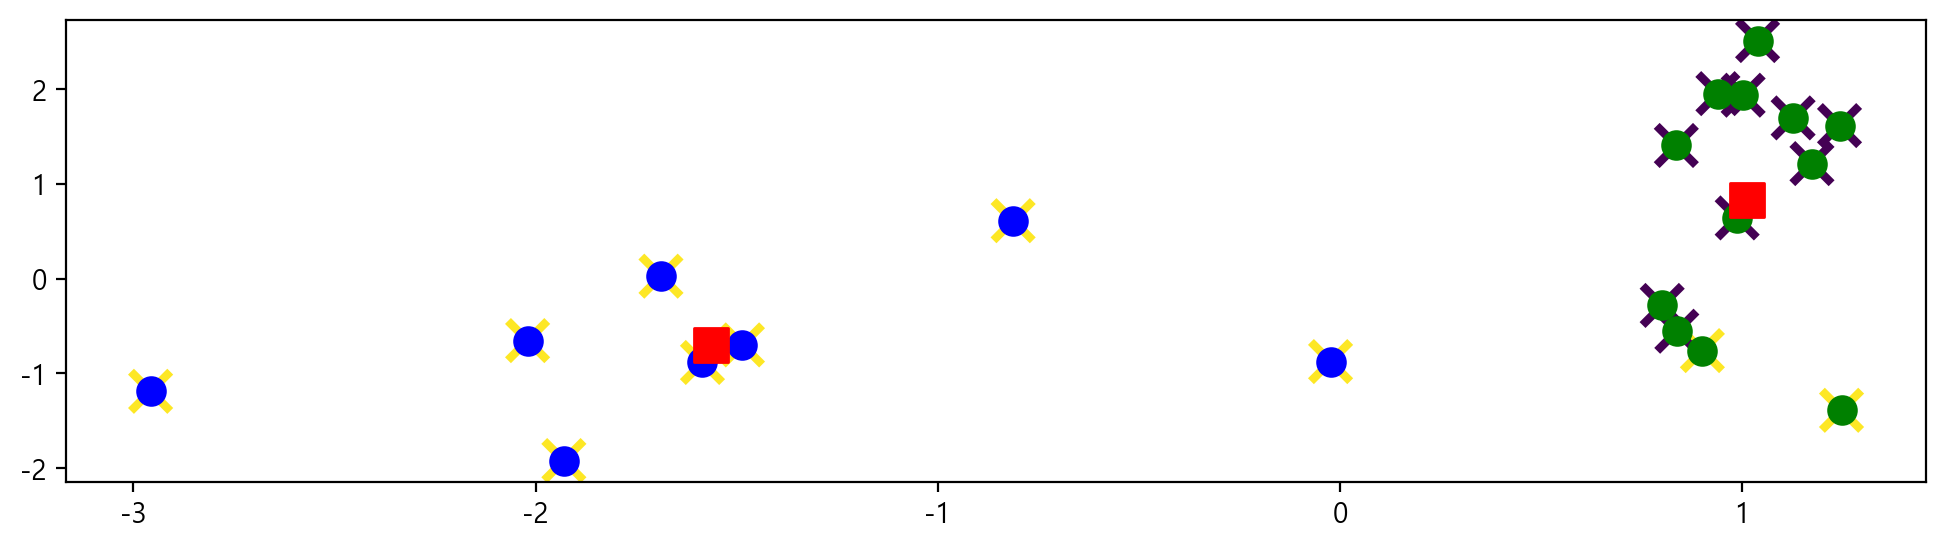

In [74]:
c0, c1 = model.cluster_centers_ # 중심점 2개
plt.figure(figsize=(12,3))
plt.scatter(x=X[:,0], y=X[:,1], marker='x', c=y, s=200, linewidth=3)
plt.scatter(x=X[model.labels_==0, 0],
            y=X[model.labels_==0, 1], marker='o', c='b', s=100)
plt.scatter(x=X[model.labels_==1, 0],
            y=X[model.labels_==1, 1], marker='o', c='g', s=100)
plt.scatter(x=c0[0], 
            y=c0[1], marker='s', c='r', s=150)
plt.scatter(x=c1[0], 
            y=c1[1], marker='s', c='r', s=150)
plt.show()

In [77]:
import pandas as pd
pd.crosstab(y, model.labels_, rownames=['실제값'],
                              colnames=['k-means값'])

k-means값,0,1
실제값,,
0,0,10
1,8,2


In [79]:
# 거리 계산시 스케일 조정
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xn = scaler.fit_transform(X)
X_df = pd.DataFrame(X, columns=['x0','x1'])
Xn_df = pd.DataFrame(Xn, columns=['x0_nor', 'x1_nor'])
pd.concat([X_df, Xn_df], axis=1)

,x0,x1,x0_nor,x1_nor
0,1.038596,2.511754,0.382116,0.924114
1,1.002714,1.935215,0.460053,0.887892
2,-1.688105,0.025994,-0.999881,0.015397
3,0.901344,-0.758966,0.764937,-0.644105
4,0.836531,1.404882,0.511615,0.859215
5,-0.023176,-0.874812,-0.026484,-0.999649
6,0.837805,-0.554389,0.833951,-0.551839
7,-1.929572,-1.918940,-0.709057,-0.705151
8,-0.812496,0.611408,-0.799038,0.601281
9,1.126947,1.695701,0.553503,0.832847


In [80]:
model = KMeans(n_clusters=2, init='k-means++', n_init=5, max_iter=300)
model.fit(Xn)
print('그룹결과 :', model.labels_)

그룹결과 : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]


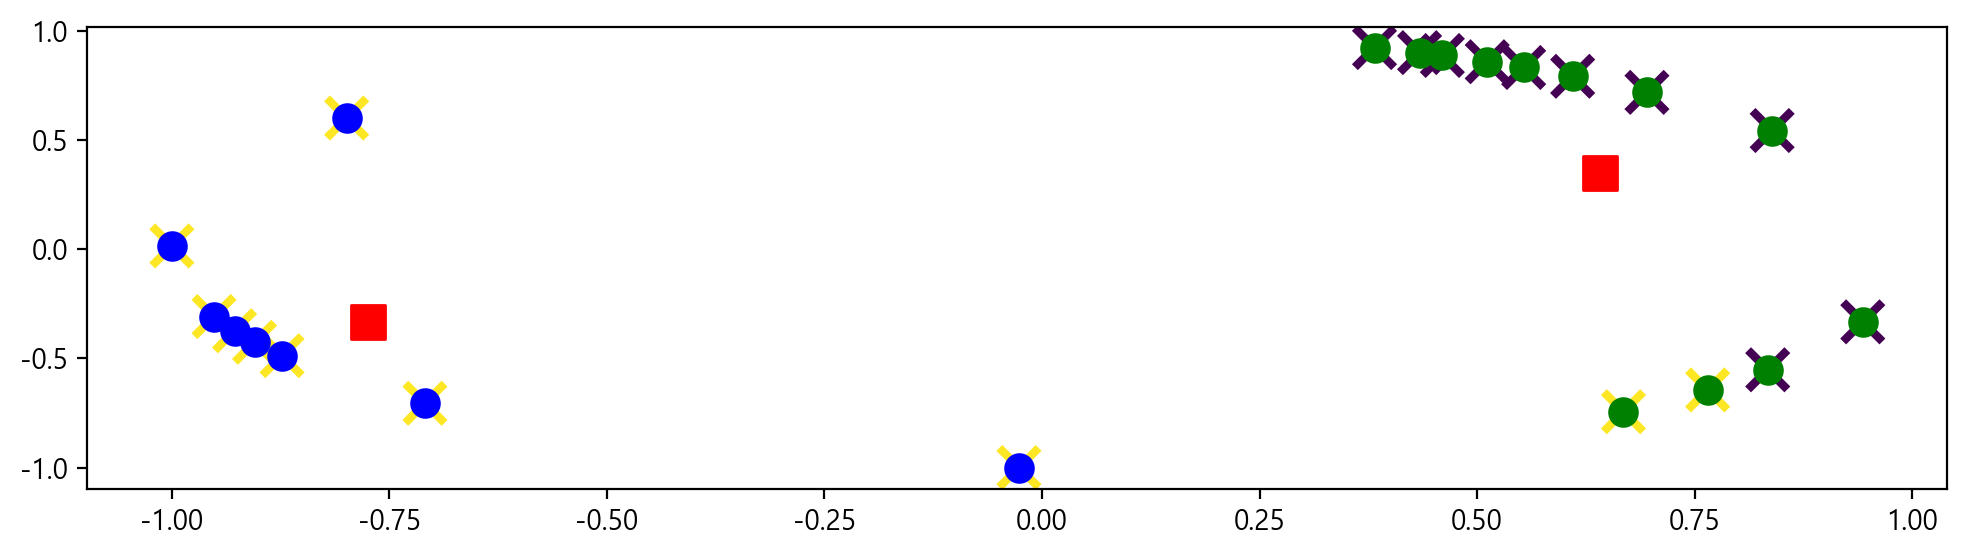

In [81]:
c0, c1 = model.cluster_centers_ # 중심점 2개
plt.figure(figsize=(12,3))
plt.scatter(x=Xn[:,0], y=Xn[:,1], marker='x', c=y, s=200, linewidth=3)
plt.scatter(x=Xn[model.labels_==0, 0],
            y=Xn[model.labels_==0, 1], marker='o', c='b', s=100)
plt.scatter(x=Xn[model.labels_==1, 0],
            y=Xn[model.labels_==1, 1], marker='o', c='g', s=100)
plt.scatter(x=c0[0], 
            y=c0[1], marker='s', c='r', s=150)
plt.scatter(x=c1[0], 
            y=c1[1], marker='s', c='r', s=150)
plt.show()

In [85]:
# 회차별 군집 확인하기
def plot_cluster(model, data):
    c0, c1 = model.cluster_centers_ # 중심점 2개
    plt.scatter(x=data[model.labels_==0, 0],
                y=data[model.labels_==0, 1], marker='o', c='b', s=100)
    plt.scatter(x=data[model.labels_==1, 0],
                y=data[model.labels_==1, 1], marker='o', c='g', s=100)
    plt.scatter(x=c0[0], 
                y=c0[1], marker='s', c='r', s=150)
    plt.scatter(x=c1[0], 
                y=c1[1], marker='s', c='r', s=150)
    return c0, c1

c0(1.05,1.76), c1(-0.59,-0.61)
c0(1.04,1.62), c1(-0.73,-0.71)
c0(1.04,1.62), c1(-0.73,-0.71)
c0(0.84,1.51), c1(-0.72,-0.83)
c0(1.04,1.62), c1(-0.73,-0.71)
c0(1.04,1.62), c1(-0.73,-0.71)


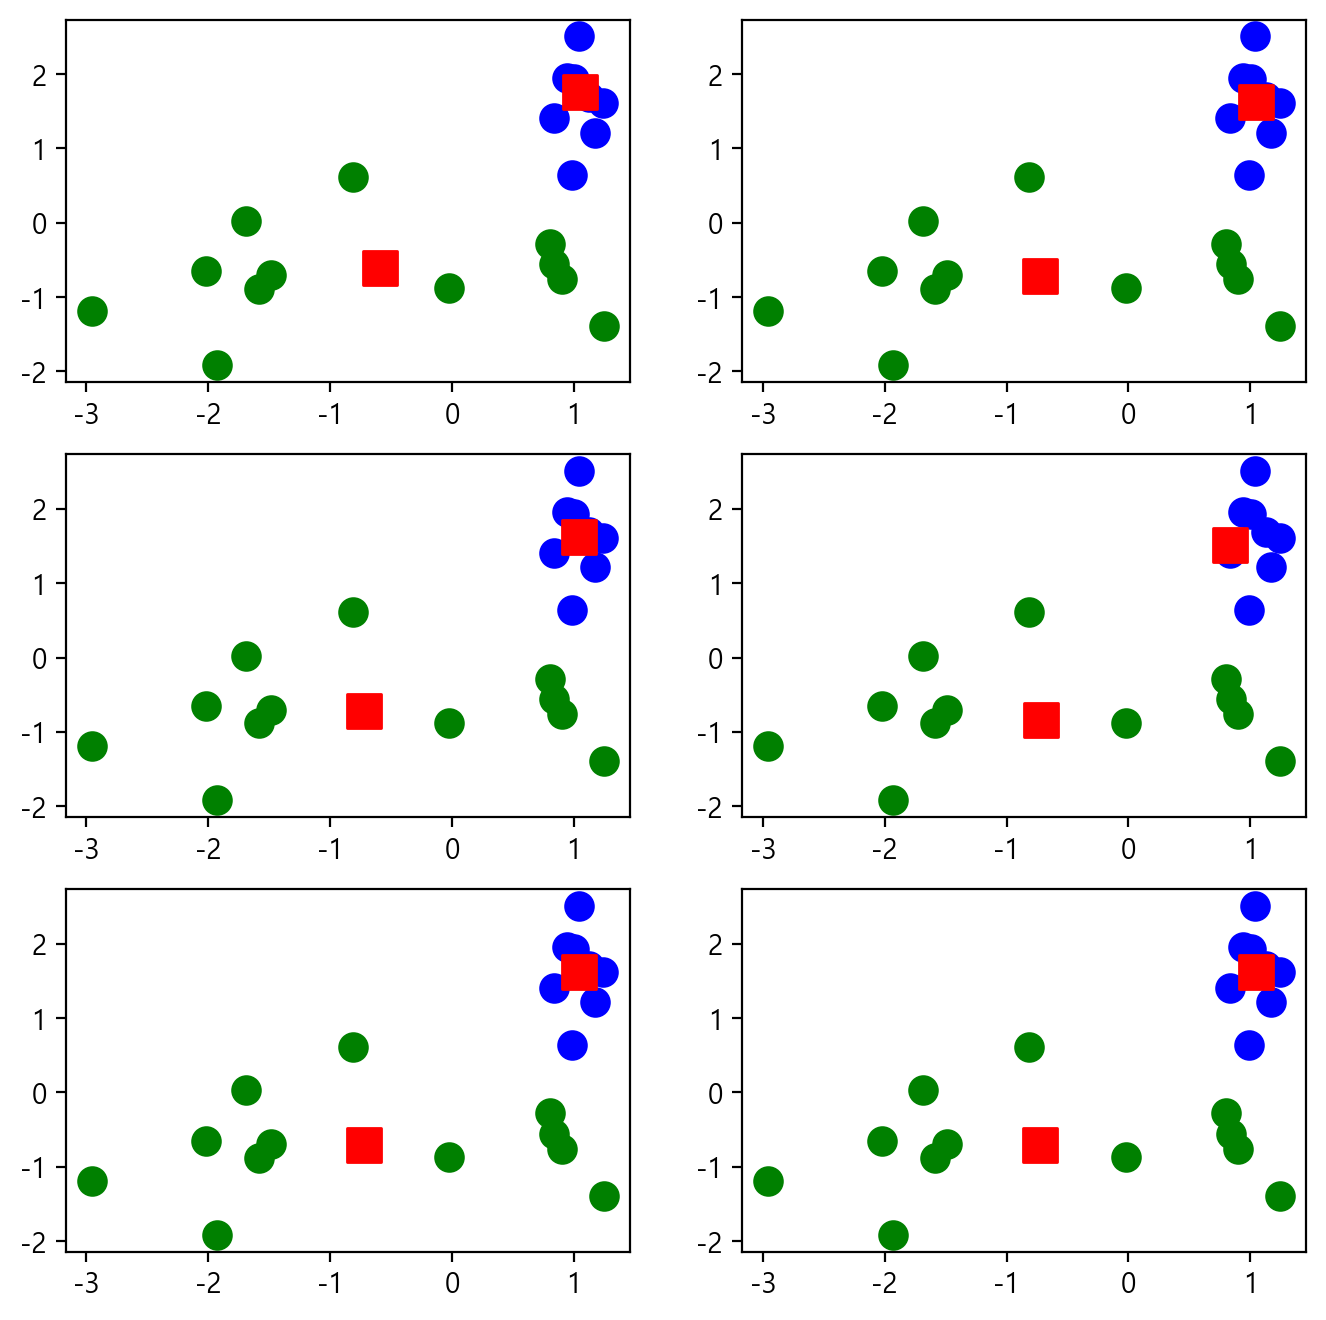

In [89]:
plt.figure(figsize=(8,8))
for i in range(1, 7):
    model = KMeans(n_clusters=2, init='random',
                  n_init=2,
                  max_iter=i,
                  random_state=1)
    model.fit(X)
    plt.subplot(3, 2, i)
    c0, c1 = plot_cluster(model, X)
    print("c0({:.2f},{:.2f}), c1({:.2f},{:.2f})".format(c0[0], c0[1], c1[0], c1[1]))
plt.show()

## K-Means 한계(pt. 13)
- 군의 특성이 다를 경우
    * 크기
    * 밀도
    * 구형
- 이상치를 포함할 경우 : 이상치를 없애고 K-Means 적용

### 군의 크기가 다를 경우

In [93]:
# normal(평균, 표준편차, size) : 정규분포 배열 생성
group0 = np.random.normal(-10, 2, (10,2))
class0 = np.full(group0.shape[0], 0)
group0 = np.c_[group0, class0]
group0[:2] # 10행 3열

array([[-9.14139165, -9.60979262,  0.        ],
       [-7.75578154, -8.32681531,  0.        ]])

In [94]:
group1 = np.random.normal(10, 2, (10,2))
class1 = np.full(group1.shape[0], 1)
group1 = np.c_[group1, class1]
group1[:2] # 10행3열

array([[ 8.9642047 , 10.22405528,  1.        ],
       [ 7.38479337,  7.92058935,  1.        ]])

In [95]:
group2 = np.random.normal(0, 5, (100,2))
class2 = np.full(group2.shape[0], 2)
group2 = np.c_[group2, class2]
group2[:2] # 100행 3열

array([[-4.94651938,  2.40013767,  2.        ],
       [ 1.82868393, -5.45535019,  2.        ]])

In [96]:
data = np.r_[group0, group1, group2]
data[::10] # 120행 3열

array([[-9.14139165, -9.60979262,  0.        ],
       [ 8.9642047 , 10.22405528,  1.        ],
       [-4.94651938,  2.40013767,  2.        ],
       [ 0.43755694,  9.18616142,  2.        ],
       [-8.76964643,  0.1151719 ,  2.        ],
       [ 7.15368043, -0.56392926,  2.        ],
       [ 9.50566027,  5.35894234,  2.        ],
       [11.42502243,  6.60668064,  2.        ],
       [ 6.61463065, -6.65833565,  2.        ],
       [-2.0078166 ,  0.80702416,  2.        ],
       [ 5.75177873,  6.27392096,  2.        ],
       [-5.4643467 ,  0.85497669,  2.        ]])

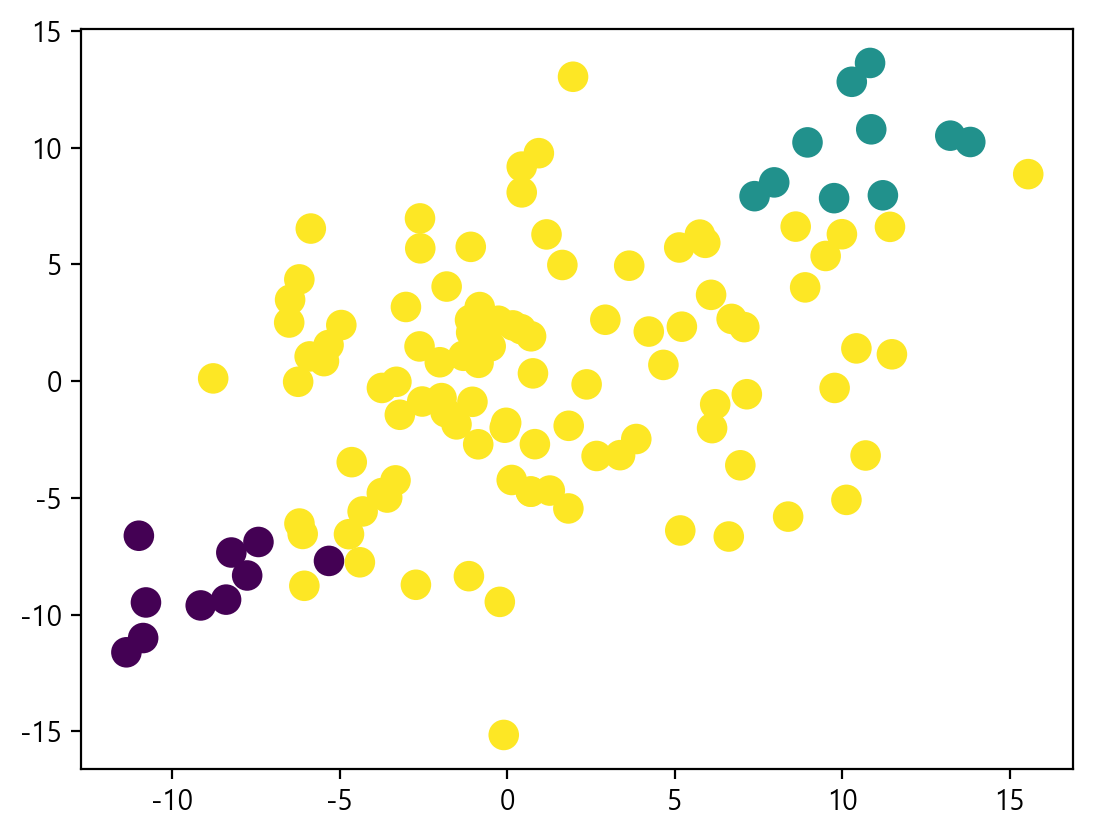

In [101]:
plt.scatter(x = data[:, 0],
            y = data[:, 1],
            c = data[:, 2],
            s=100)
plt.show()

In [102]:
model = KMeans(n_clusters=3,
              init='random',
              n_init=5)
model.fit(data[:,0:2])

KMeans(init='random', n_clusters=3, n_init=5)

In [103]:
c = model.cluster_centers_ # 그룹군들의 중심점
c

array([[-4.03232277, -7.27085942],
       [-1.52990113,  1.66848789],
       [ 8.43275053,  4.56461792]])

In [104]:
model.labels_ # model.predict(data[:,0:2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 0, 2])

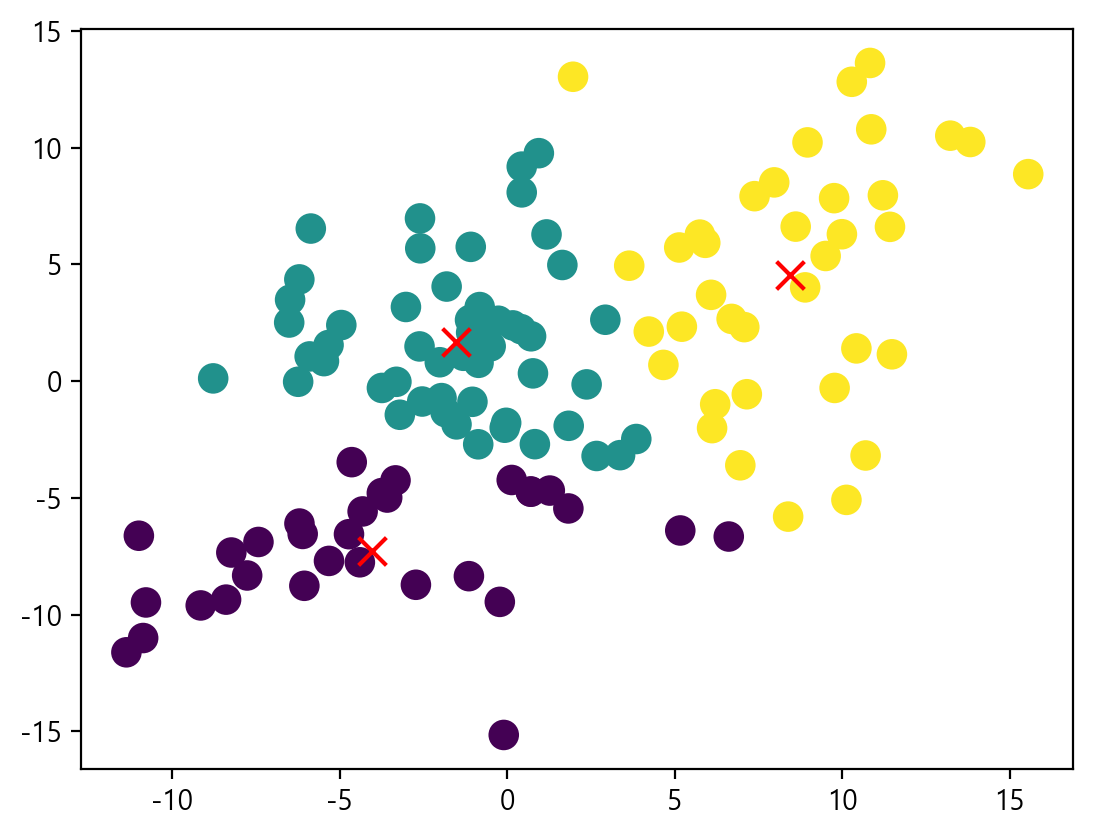

In [108]:
plt.scatter(x = data[:, 0],
            y = data[:, 1], 
            c = model.labels_, s=100)
plt.scatter(x = c[:,0], y=c[:,1], c='r', s=100, marker='x')

In [109]:
# 군의 크기가 다를 경우의 K-Means 극복하기
model = KMeans(n_clusters=6, init='k-means++', n_init=5)
model.fit(data[:, 0:2])

KMeans(n_clusters=6, n_init=5)

In [110]:
centers = model.cluster_centers_ # 중심점
colors = ['r','g','b','c','m','k']
markers = ['o','s','v','^','.','<']
model.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4,
       1, 3, 4, 3, 0, 3, 5, 5, 5, 1, 4, 5, 3, 3, 4, 0, 1, 5, 0, 1, 5, 0,
       0, 3, 0, 2, 0, 1, 1, 0, 5, 0, 3, 2, 5, 0, 5, 0, 2, 0, 0, 4, 3, 0,
       0, 0, 0, 3, 2, 4, 4, 5, 4, 4, 4, 5, 4, 4, 1, 0, 1, 3, 4, 5, 4, 1,
       0, 1, 0, 5, 0, 2, 5, 4, 1, 0, 0, 4, 5, 4, 4, 4, 5, 3, 0, 3, 3, 0,
       0, 0, 4, 4, 0, 5, 0, 5, 4, 1])

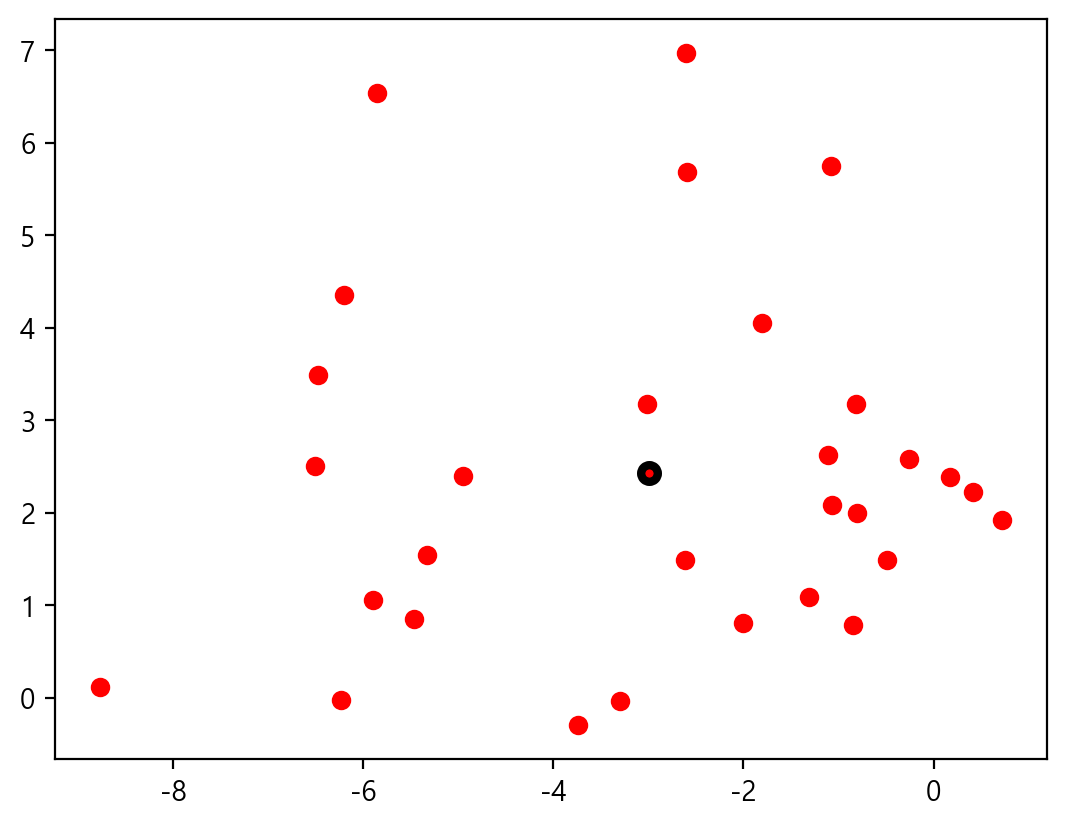

In [115]:
for i, c in enumerate(centers):
    if i == 0:
        plt.scatter(x=data[model.labels_==i,0], y=data[model.labels_==i,1],
                   c=colors[i], marker=markers[i])
        plt.scatter(x=c[0], y=c[1], c=colors[i], lw=3, edgecolors='k')